**Forma de visualizar dados em forma de graficos**

Exemplo usando os dados que foram analisados anteriormente

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Lendo o arquivo CSV com o delimitador correto
tesouroDireto = pd.read_csv('csv/EstoqueTesouroDireto.csv', delimiter=';')

# Convertendo a coluna de data de vencimento para datetime com `dayfirst=True`
tesouroDireto['Vencimento do Titulo'] = pd.to_datetime(tesouroDireto['Vencimento do Titulo'], dayfirst=True, errors='coerce')

# Calculando o tempo restante para o vencimento
tesouroDireto['Tempo para Vencimento'] = (tesouroDireto['Vencimento do Titulo'] - pd.Timestamp.now()).dt.days

# Classificando entre curto prazo (<= 5 anos) e longo prazo (> 5 anos)
tesouroDireto['Prazo'] = tesouroDireto['Tempo para Vencimento'].apply(lambda x: 'Curto Prazo' if x <= 5*365 else 'Longo Prazo')

# Contando quantos títulos estão em cada categoria
vencimento_contagem = tesouroDireto['Prazo'].value_counts()

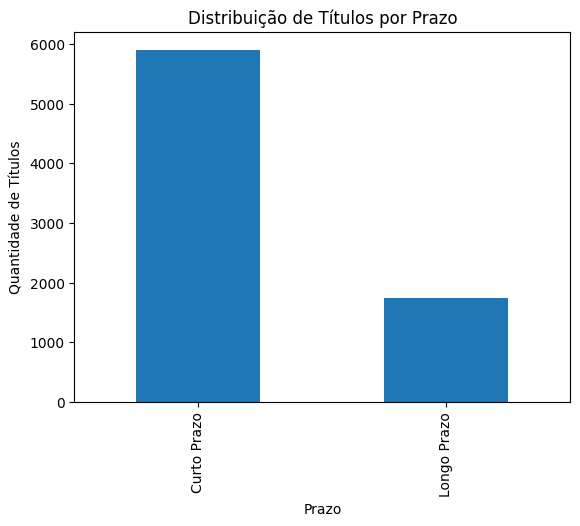

In [3]:
vencimento_contagem.plot(kind='bar', title='Distribuição de Títulos por Prazo')
plt.ylabel('Quantidade de Títulos')
plt.show()